# Comparison of AB Test and Conversion of Bidding Methods

Facebook recently introduced a new bidding type, '*average bidding*', as an alternative to the existing bidding type called '*maximum bidding*'. <br>

One of the clients, bombabomba.com, decided to test this new feature and would like to do an A/B test to see if average bidding converts more than maximum bidding. <br>

The A/B test has been going on for 1 month and bombabomba.com is now waiting for an analyze for the results of this A/B test. The ultimate success criterion for bombabomba.com is purchase. Therefore, the focus should be on the purchase metric for statistical testing.

## Dataset

In this dataset, which includes the website information of a company, there is information such as the number of advertisements that users see and click, as well as earnings information from here. There are two separate data sets, the control and test groups. These datasets are in separate sheets of the ab_testing.xlsx excel. Maximum Bidding was applied to the control group and Average Bidding was applied to the test group.

*Impression* : Number of ad views<br>
*Click* : Number of clicks on the displayed ad<br>
*Purchase* : The number of products purchased after the ads clicked<br>
*Earning* : Earnings after purchased items

In [1]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr
from scipy.stats import spearmanr,kendalltau,f_oneway,kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [2]:
df_control = pd.read_excel("datas/ab_testing.xlsx", sheet_name="Control Group")
df_test = pd.read_excel("datas/ab_testing.xlsx", sheet_name="Test Group")

In [3]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [4]:
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


Step 1: The data set ab_testing_data.xlsx consisting of control and test group data will be read. Control and test group data will be assigned to separate variables.<br>
Step 2: Control and test group data will be analyzed<br>
Step 3: After the analysis, the control and test group data will be combined using the concat method.<br>

In [5]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,85726.690349,99790.701078,115212.816543,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,4124.304129,5001.220602,5923.803596,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2497.295218


In [6]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708


In [7]:
data = pd.concat([df_control, df_test], axis=0)
data.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [8]:
len(data)

80

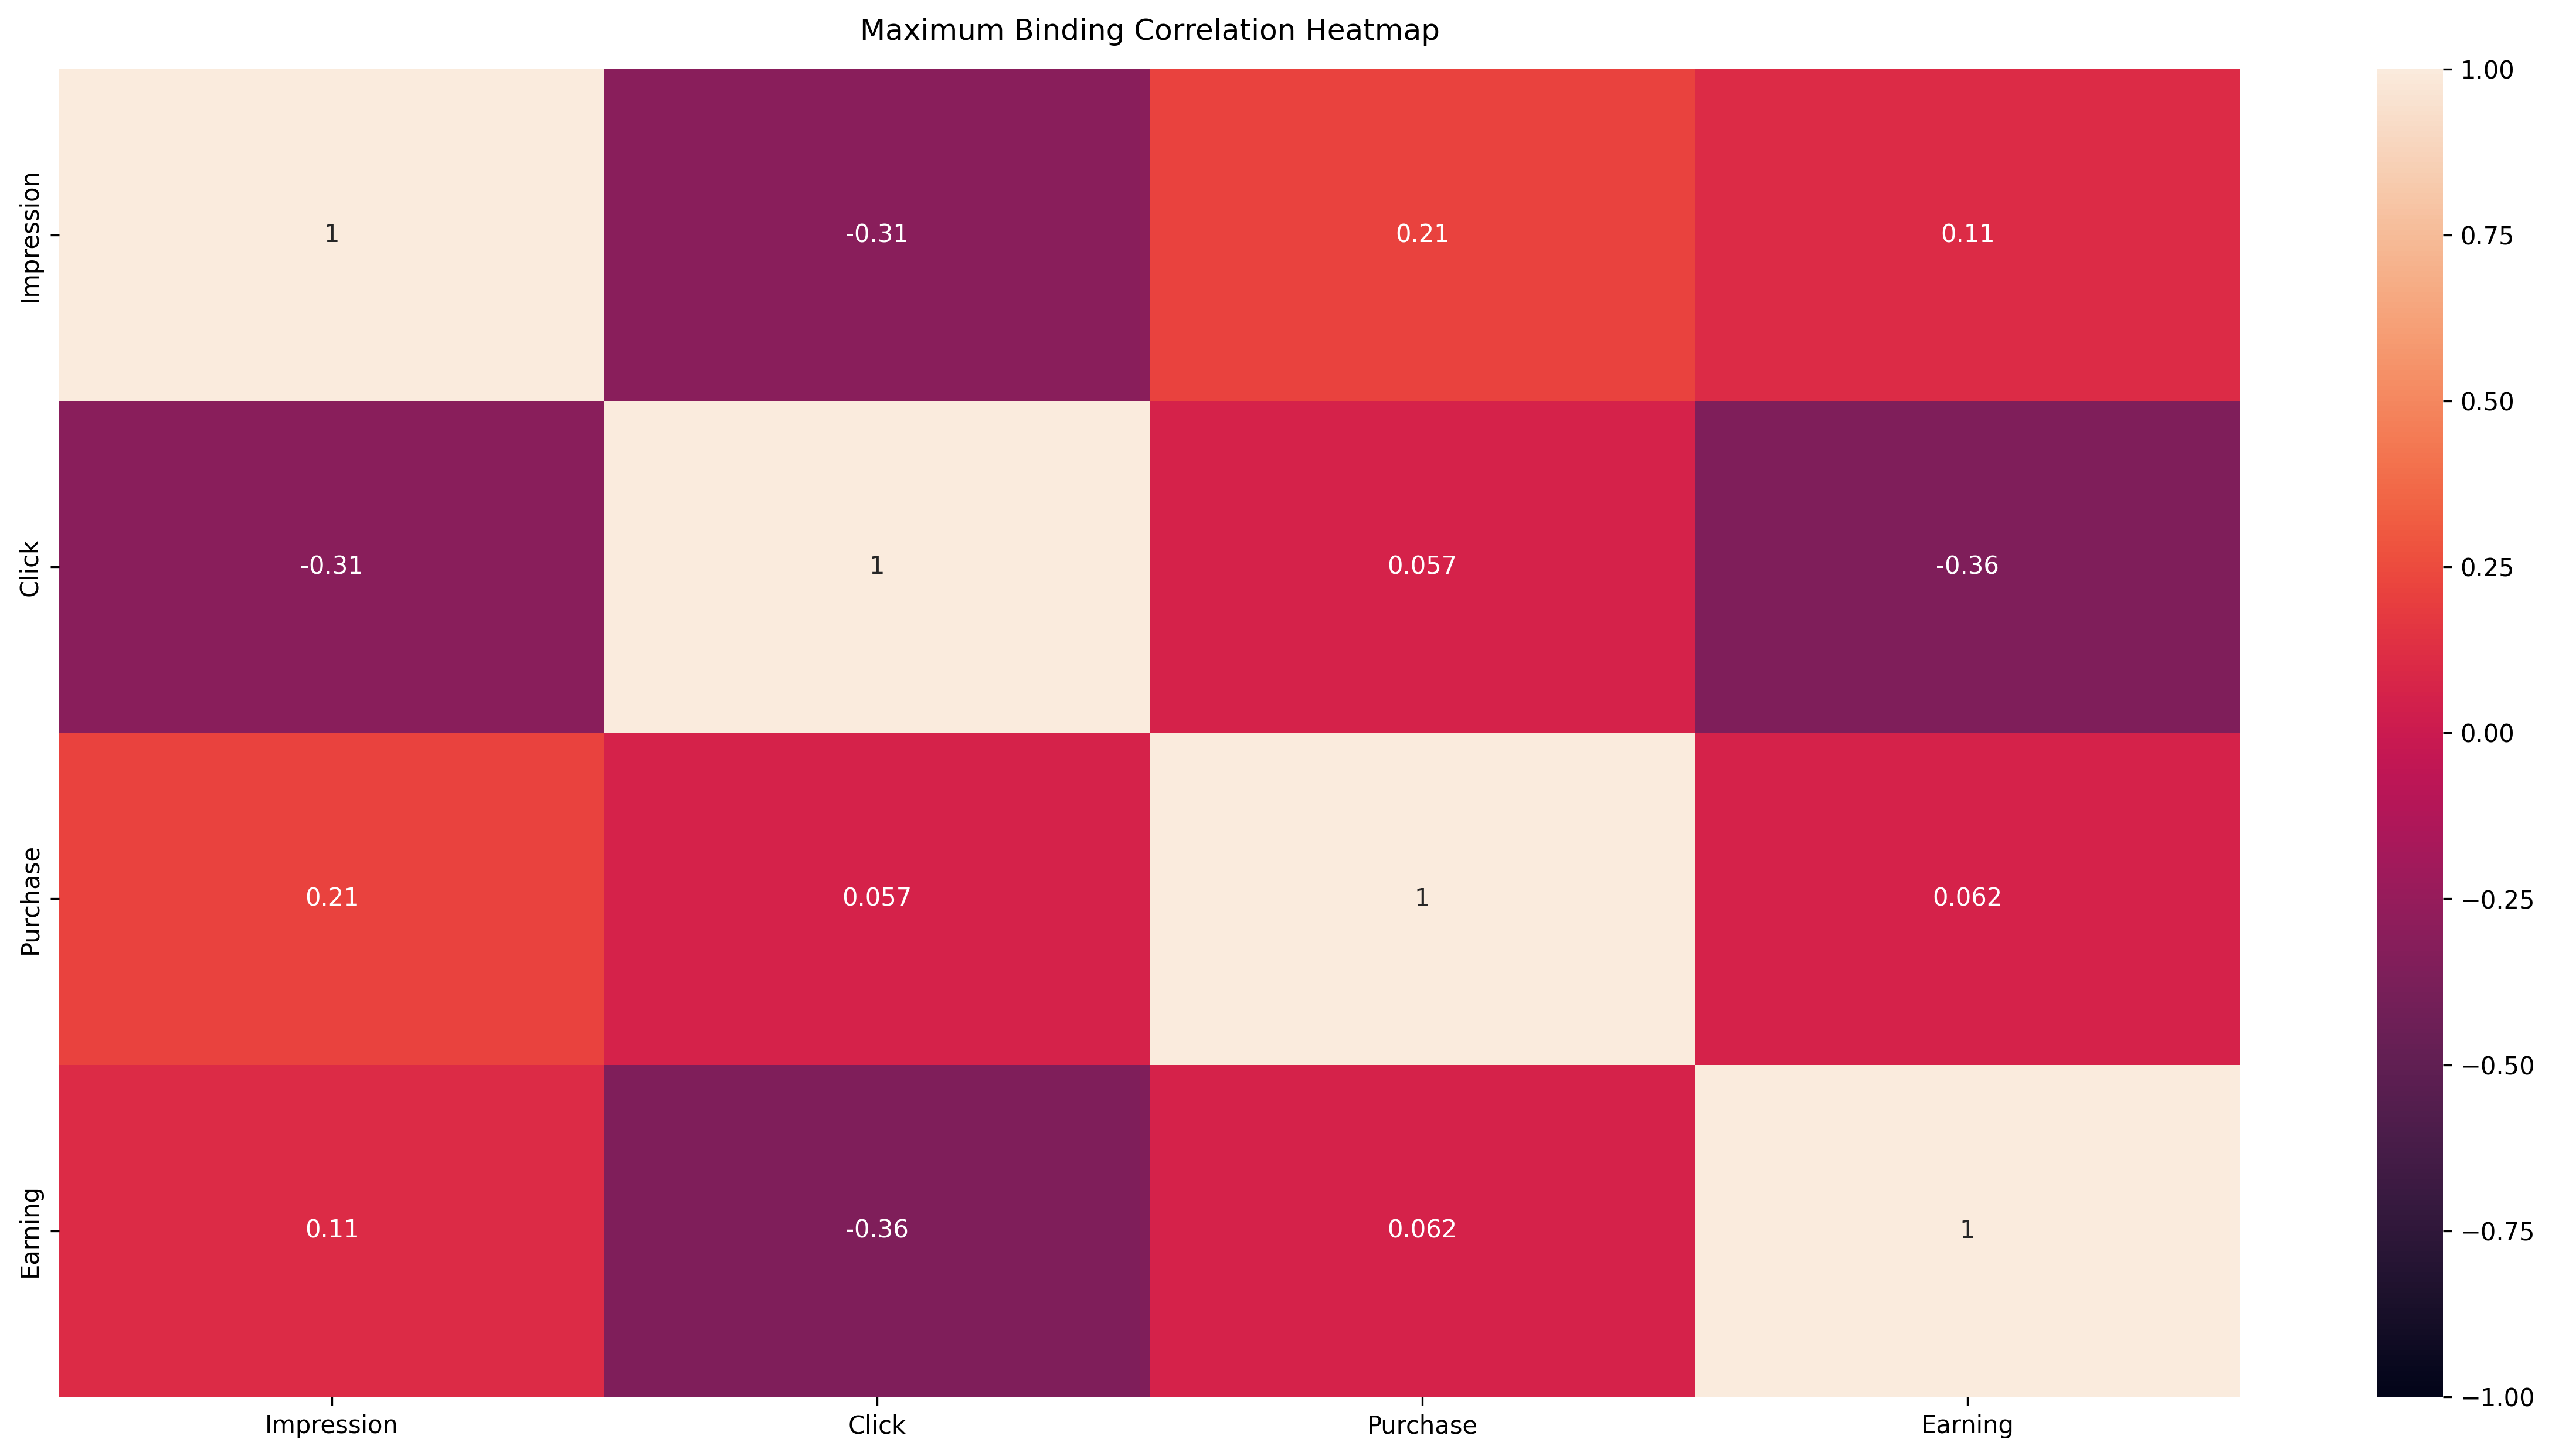

In [9]:
fig, ax = plt.subplots(figsize=(20,10), dpi=300)
heatmap = sns.heatmap(df_control.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Maximum Binding Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

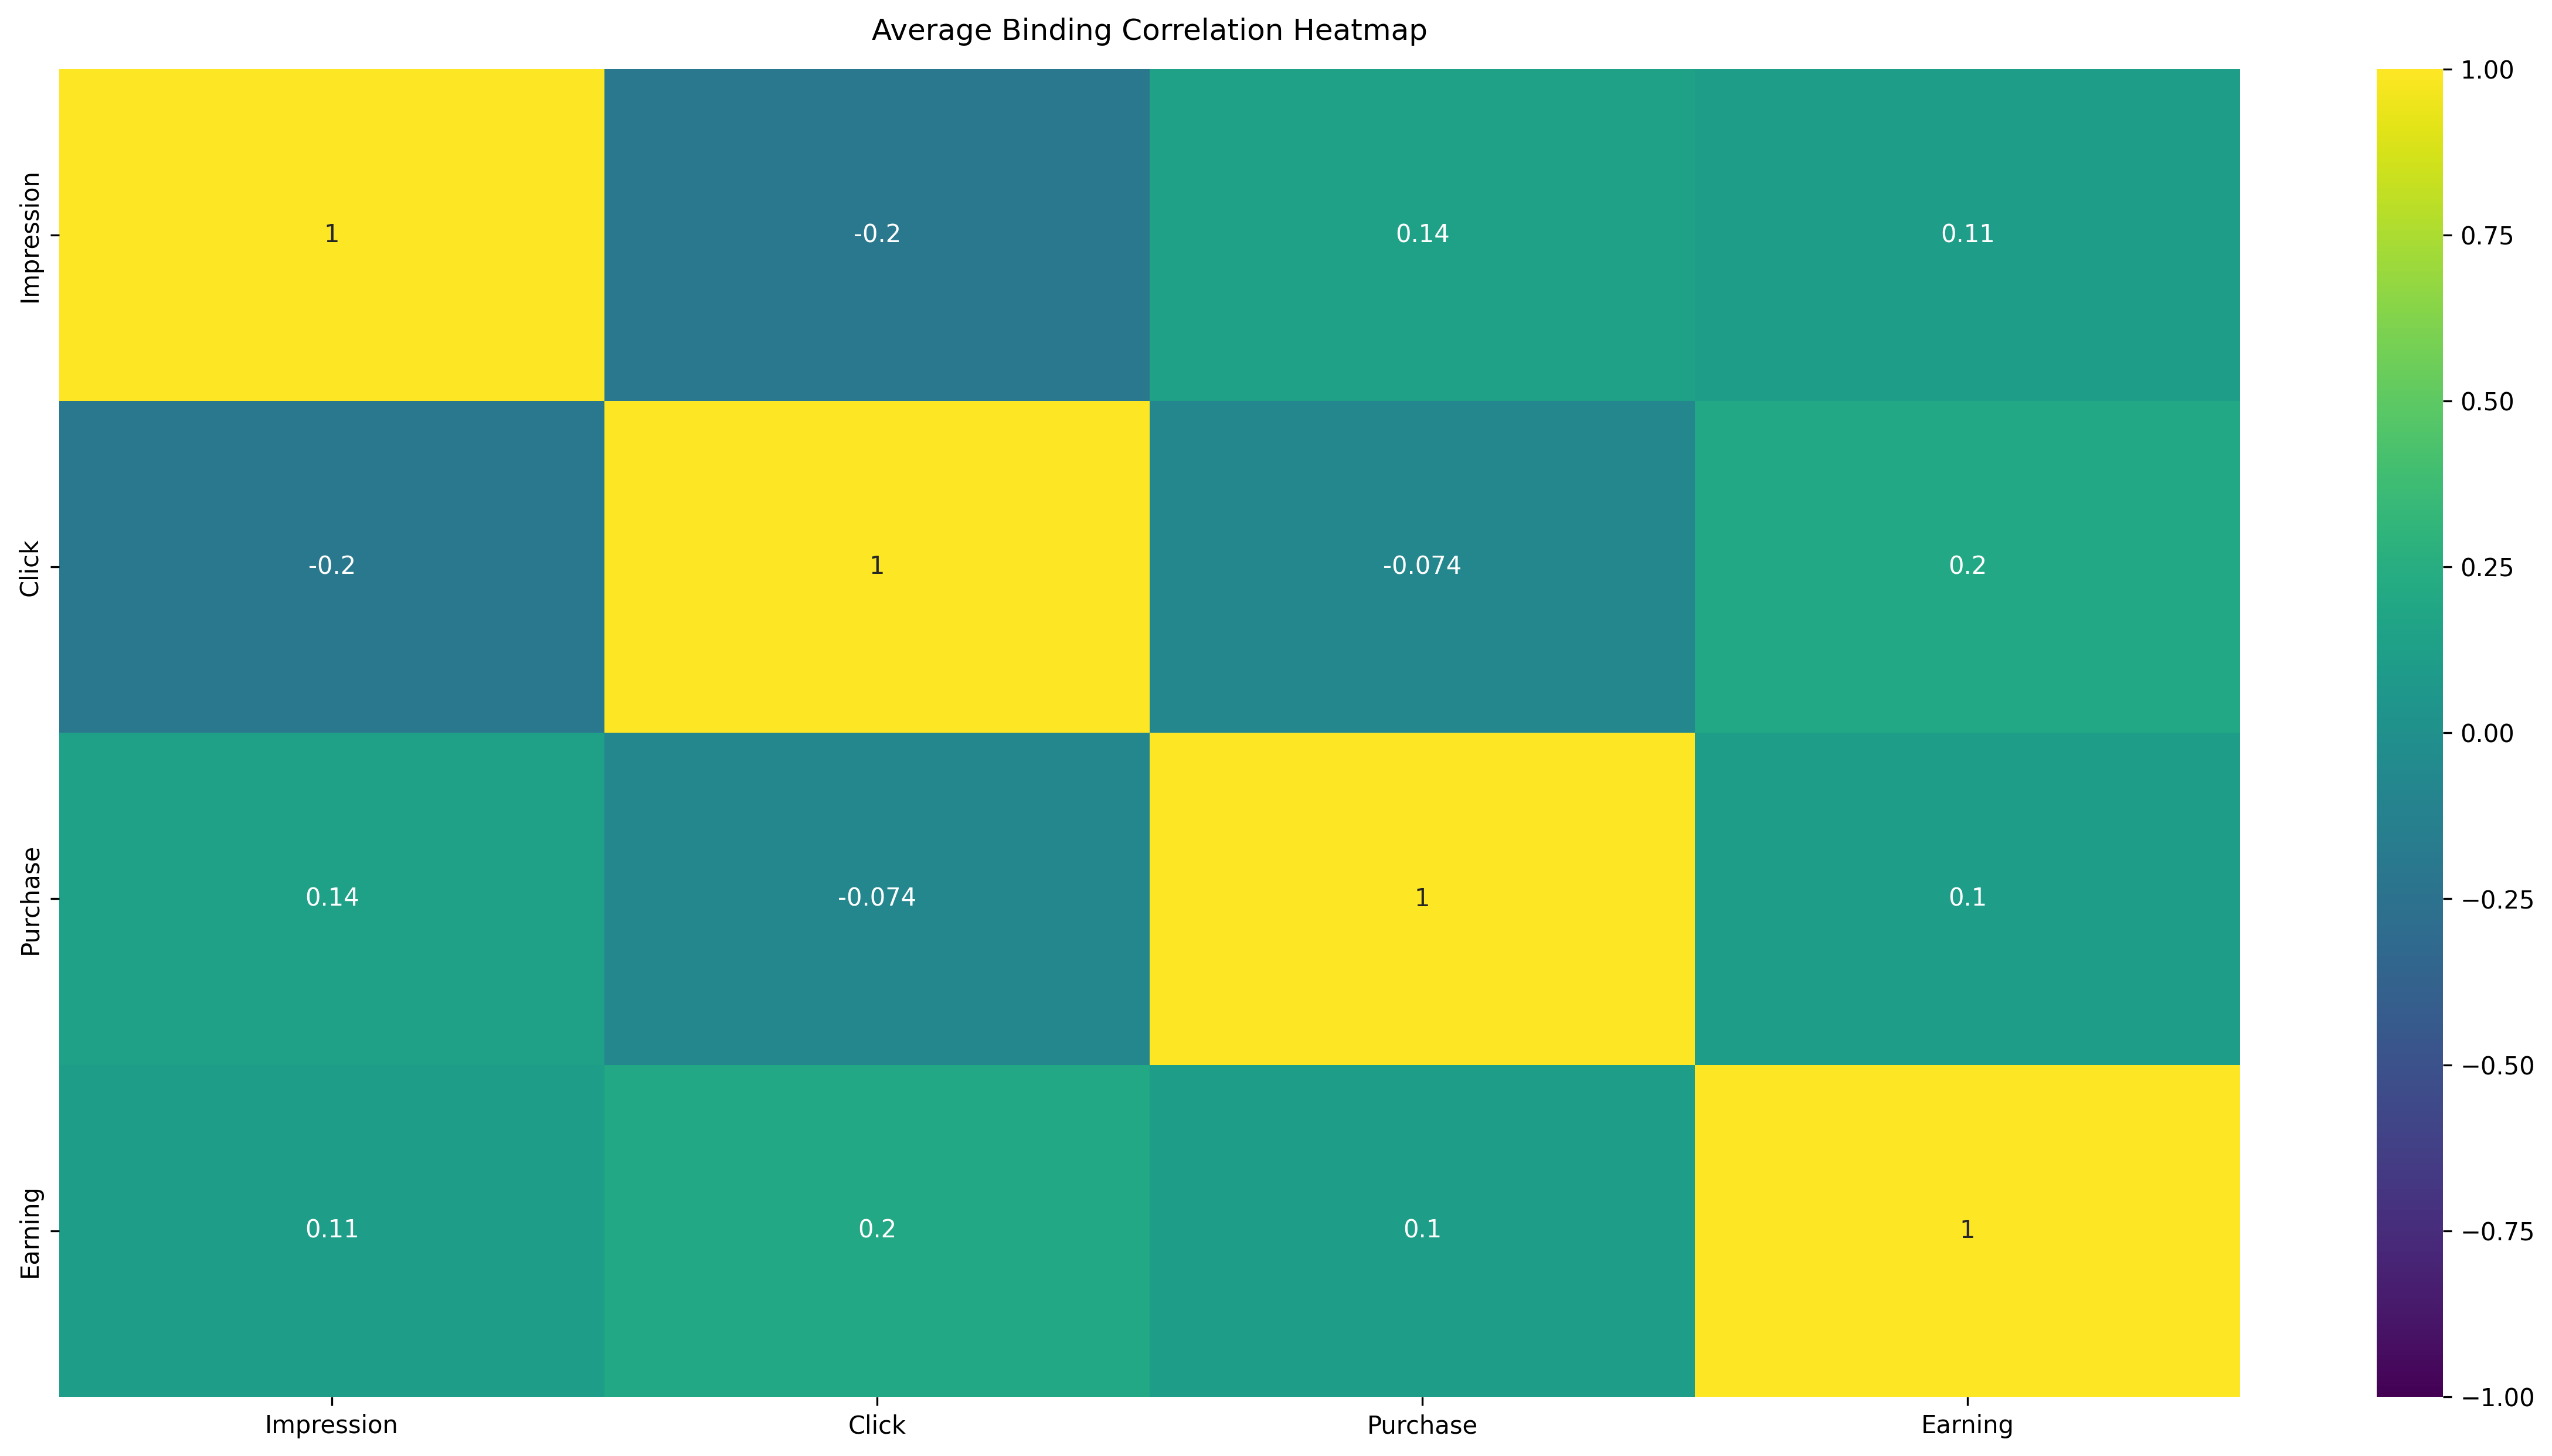

In [10]:
fig, ax = plt.subplots(figsize=(20,10), dpi=300)
heatmap_test = sns.heatmap(df_test.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap_test.set_title('Average Binding Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

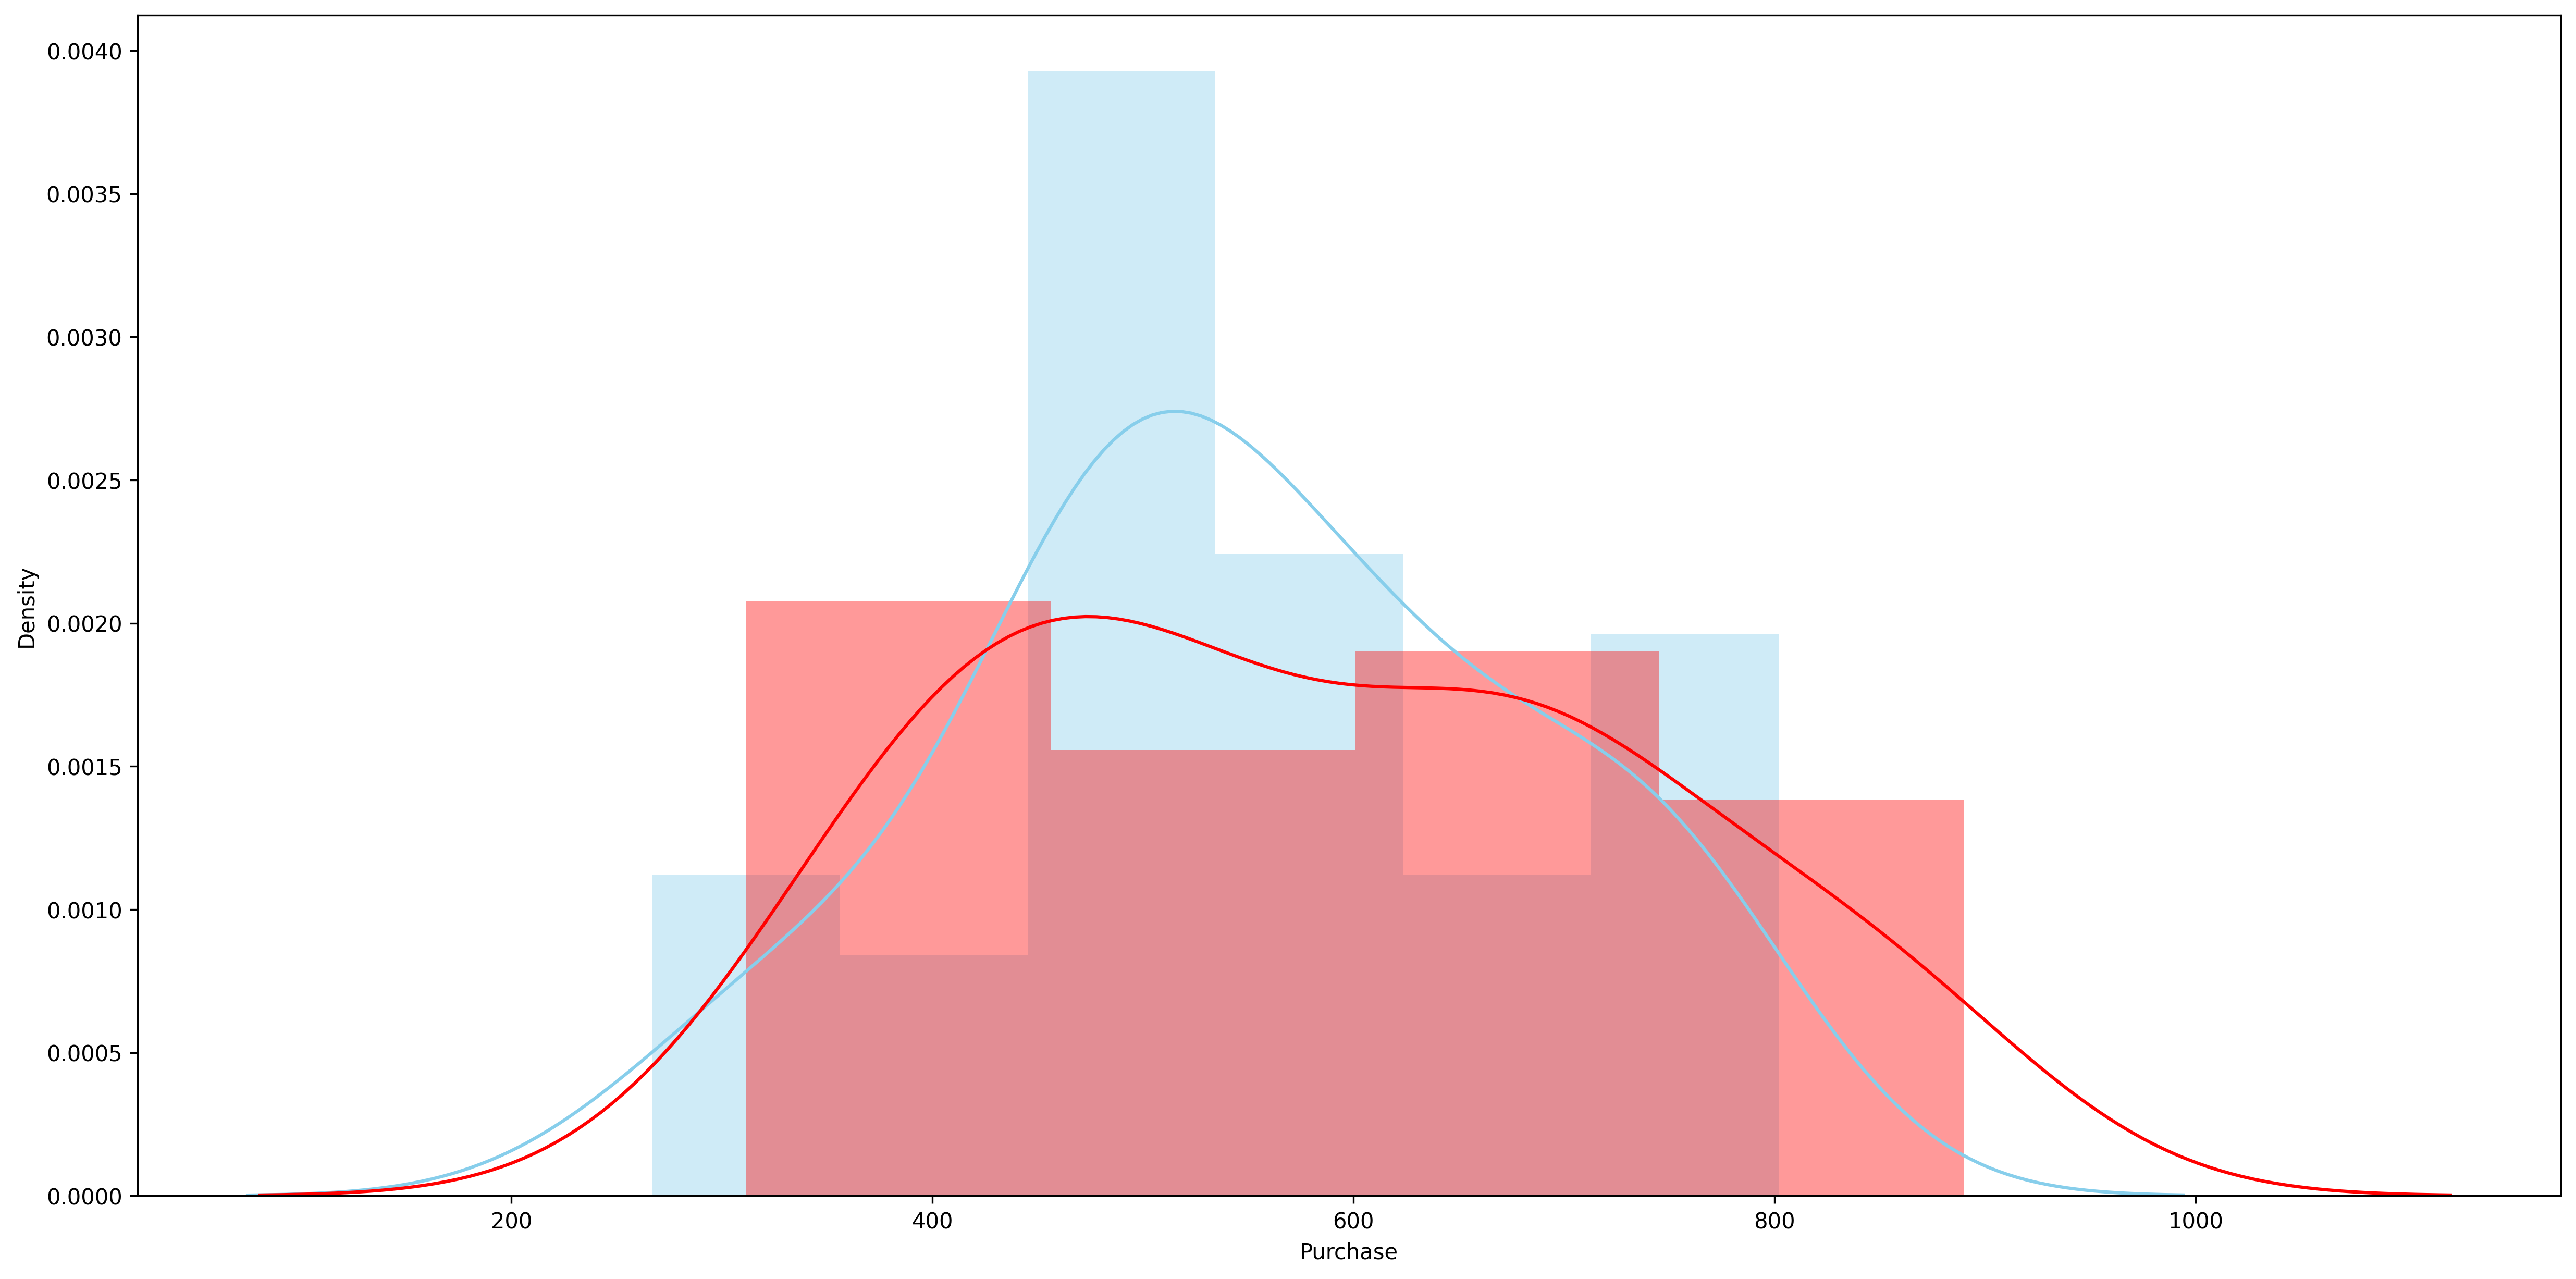

In [11]:
fig, ax = plt.subplots(figsize=(20,10), dpi=300)
sns.distplot(df_control["Purchase"] , color="skyblue", label="Maximum Binding");
sns.distplot(df_test["Purchase"] , color="red", label="Average Binding");

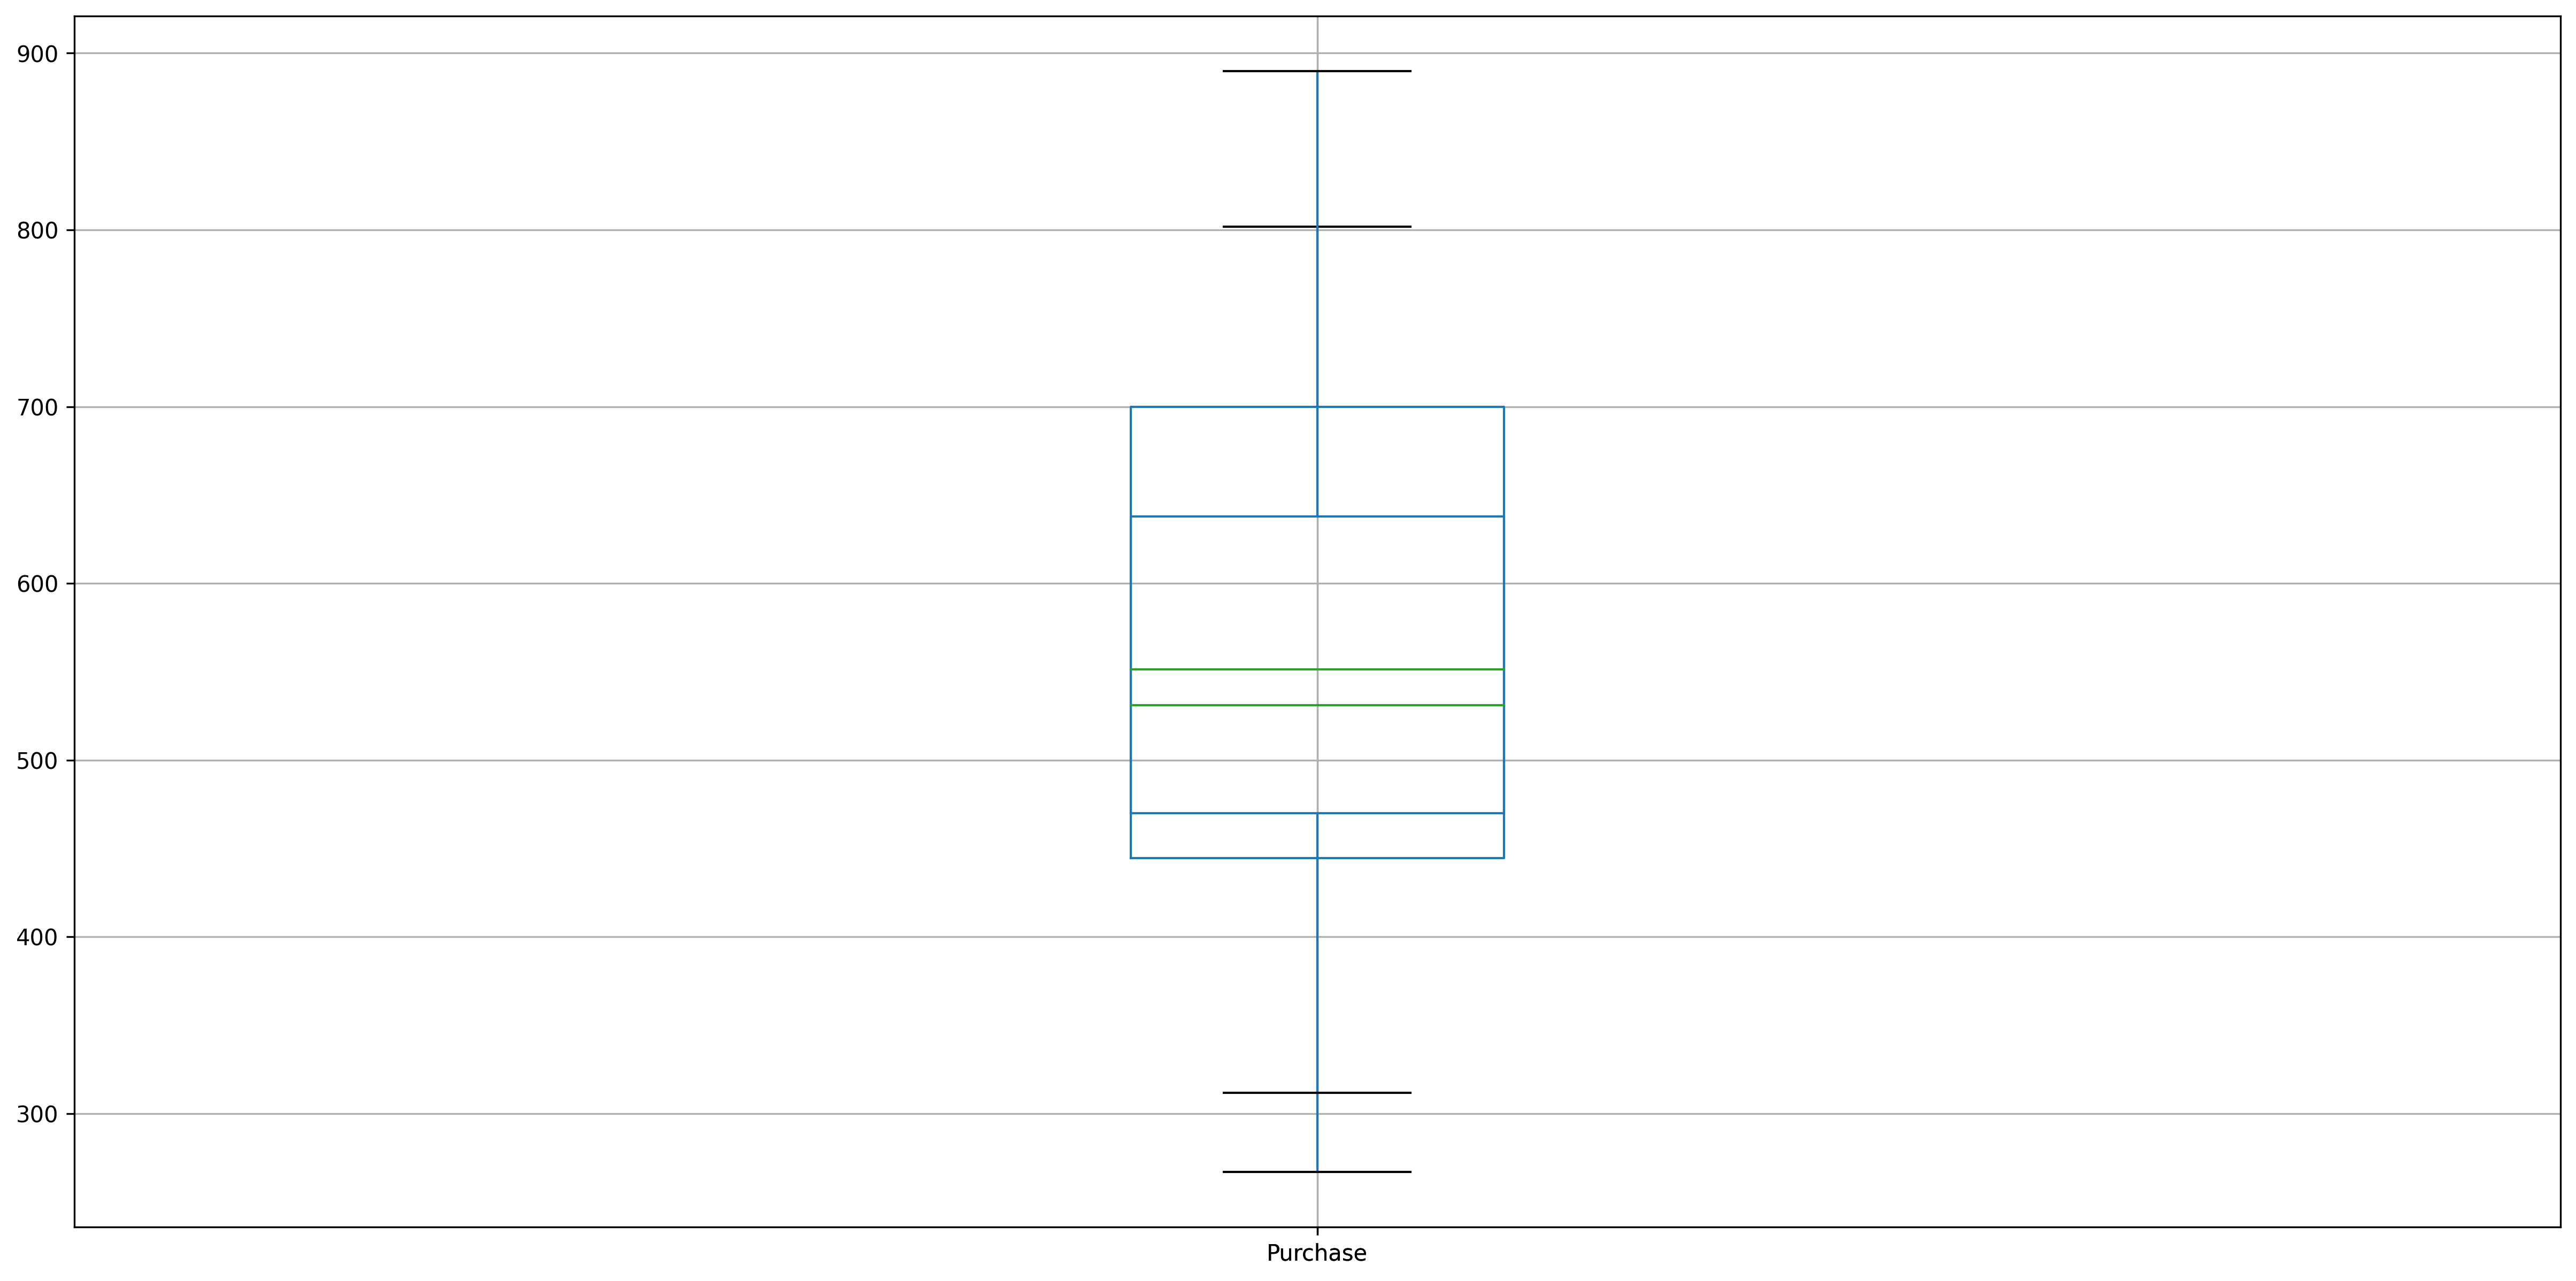

In [12]:
fig, ax = plt.subplots(figsize=(20,10), dpi=300)
df_control.boxplot(column=["Purchase"],return_type=None)
df_test.boxplot(column=["Purchase"],return_type=None);

## Formulating Hypothesis

Null hypothesis:  **H0:p=p0** <br>
Alternative hypothesis:  **H1:p≠p0**<br>
where  *p*  and  *p0*  stand for the conversion rate of the maximum and average bidding method.

The confidence level will be set as *95%* or 0.95. Hence,  *α=1−0.95=0.05*

In [13]:
# Analyzing the purchase (gain) averages for the control and test group.
print(df_control["Purchase"].mean())
print(df_test["Purchase"].mean())

550.8940587702316
582.1060966484677


As it stated before Average Bidding was applied to the test group and test group data has higher average for Purchase.

Before hypothesis testing is done, hypothesis checks are done. These are **Assumption of Normality** and **Homogeneity of Variance**. Whether the control and test groups comply with the normality assumption will be tested separately over the Purchase variable.

**Normality Assumption** :<br>
H0: Normal distribution assumption is provided.<br>
H1: The assumption of normal distribution is not provided.

In [14]:
pvalue_control = shapiro(df_control["Purchase"])[1]
print("p-value:%.4f" % pvalue_control)

pvalue_test = shapiro(df_test["Purchase"])[1]
print("p-value:%.4f" % pvalue_test)

p-value:0.5891
p-value:0.1541


A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

Therefore normality assumption is provided because both p values are bigger than 0.05.

**Variance Homogeneity** :<br>
H0: Variances are homogeneous.<br>
H1: Variances are not homogeneous.<br>

In [15]:
teststat, pvalue = levene(df_control["Purchase"],
                          df_test["Purchase"])

print("Test Stat = %.4f, p-value = %.4f" %(teststat,pvalue)) 

Test Stat = 2.6393, p-value = 0.1083


The p-value for the Levene test is greater than 0.05, then the variances are not significantly different from each other (i.e., the homogeneity assumption of the variance is met). 

Therefore the chosen test will be ANOVA because three primary assumptions in ANOVA are provided in this case;<br>
    - The responses for each factor level have a normal population distribution.<br>
    - The distributions have the same variance.<br>
    - The data are independent.

In [16]:
test_stat, pvalue = ttest_ind(df_control["Purchase"],df_test["Purchase"],equal_var=True)

print("Test Stat = %.4f, p-value = %.4f" %(test_stat,pvalue)) 

Test Stat = -0.9416, p-value = 0.3493


Independent Samples t Test resulted as p > .05 which indicates that H0 can not be rejected. According to this, it can be say that there is no significant difference between **maximum binding** and **average binding** in Purchase values. 

Purchase doesn't differ much from one another. One can select either bidding system if they wish to make a decision based on just one measure.